In [373]:
import pandas as pd
import numpy as np
import datetime
import collections
from dateutil.parser import parse
from collections import Counter, OrderedDict
from nltk.util import ngrams
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import tools
import plotly

# pandas options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)

In [374]:
# open pickled file
df = pd.read_pickle("./Cleaned_RT_News.pkl")

# drop empty articles: Convert NaN values to empty string
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Cleaned Article"], inplace=True)

# drop unncessary rows
df = df.drop(751)


In [375]:
# extend orginal df with columns about statistical properties of different topics/categories
columns = ['Word Count', 'Time','Date', 'BoW', 'Trigrams']
       
df = pd.concat([df,pd.DataFrame(columns=columns)])

In [376]:
# class ArticleStats has different methods:
# - word count: counts the words of an article
# - get_date: gets the publishing date of the article
# - get_time: gets the publishing date of the article
# - get_bow: creates a bag of words dict out of each article
# - get_trigrams: creates trigrams from article and stores them in a list

class ArticleStats:
    def __init__(self, df_data):
        self.df_data = df_data

    def word_count(self):
        
        # word count based on the cleaned article
        cleaned_article = self.df_data
        article_word_count = len(cleaned_article.split())
        return article_word_count
    
    def get_date(self):
        
        # time and date: clean, parse, extract
        date_time = self.df_data
        cleaned_date_time = date_time.replace('•', '').replace('Uhr', '')
        
        parse_date = parse(cleaned_date_time)
        
        date = parse_date.date()
        return date
    
    def get_time(self):
        
        # time and date: clean, parse, extract
        date_time = self.df_data
        cleaned_date_time = date_time.replace('•', '').replace('Uhr', '') 
        
        parse_time = parse(cleaned_date_time)
        
        time = parse_time.time()
        return time
    
    def get_bow(self):
        
        lemmas = self.df_data
        
        # Bow: counts word occurences, and returns ordered dictionary beginning with the most common
        bow = OrderedDict(Counter(lemmas).most_common())
        return bow
    
        
    def get_trigrams(self):
        
        cleaned_article = self.df_data
        
        # stores trigrams in a list
        trigrams_list = list(ngrams(cleaned_article.split(), 3))
        return trigrams_list


# apply ArticleStats methods to each row/article                 
df['Word Count'] = df['Cleaned Article'].apply(lambda row: ArticleStats(row).word_count())
df['Date'] = df['Date Published'].apply(lambda row: ArticleStats(row).get_date())
df['Time'] = df['Date Published'].apply(lambda row: ArticleStats(row).get_time()) 
df['BoW'] = df['Lemmas'].apply(lambda row: ArticleStats(row).get_bow()) 
df['Trigrams'] = df['Cleaned Article'].apply(lambda row: ArticleStats(row).get_trigrams()) 

df

,News Site,Category,Article Title,Date Published,Article,Cleaned Article,No Stopwords,Tokens,Lemmas,Word Count,Time,Date,BoW,Trigrams
0,https://deutsch.rt.com,gesellschaft,"""Schande für alle Künstler"" oder nicht radikal...",10.09.2020 • 22:07 Uhr,Mit einer neuen Reihe von Inklusionsnormen für...,Mit einer neuen Reihe von Inklusionsnormen für...,neuen Reihe Inklusionsnormen künftige OscarVer...,"[neuen, Reihe, Inklusionsnormen, künftige, Osc...","[neu, Reihe, Inklusionsnormen, künftig, OscarV...",943,22:07:00,2020-10-09,"{'Film': 13, 'neu': 11, 'Standard': 5, 'erfüll...","[(Mit, einer, neuen), (einer, neuen, Reihe), (..."
1,https://deutsch.rt.com,gesellschaft,Russischer Journalistenverband würdigt Julian ...,9.09.2020 • 19:40 Uhr,Der Verband der Journalisten Russlands hat am ...,Der Verband der Journalisten Russlands hat am ...,Verband Journalisten Russlands Dienstag austra...,"[Verband, Journalisten, Russlands, Dienstag, a...","[Verband, Journalist, Russlands, Dienstag, aus...",342,19:40:00,2020-09-09,"{'Journalist': 9, 'Julian': 4, 'Assange': 4, '...","[(Der, Verband, der), (Verband, der, Journalis..."
2,https://deutsch.rt.com,gesellschaft,Digitaler Nachlass: Gericht erlaubt Entsperrun...,9.09.2020 • 11:26 Uhr,Im Streit um das digitale Erbe des Mädchens mu...,Im Streit um das digitale Erbe des Mädchens mu...,Streit digitale Erbe Mädchens soziale Netzwerk...,"[Streit, digitale, Erbe, Mädchens, soziale, Ne...","[Streit, digitale, Erbe, Mädchen, soziale, Net...",223,11:26:00,2020-09-09,"{'Facebook': 5, 'Eltern': 5, 'Erbe': 3, 'Mädch...","[(Im, Streit, um), (Streit, um, das), (um, das..."
3,https://deutsch.rt.com,gesellschaft,Menschen mit Behinderung meist ohne Job: Inklu...,7.09.2020 • 16:58 Uhr,Das Unternehmen beschäftigt und bildet Mensche...,Das Unternehmen beschäftigt und bildet Mensche...,Unternehmen beschäftigt bildet Menschen Behind...,"[Unternehmen, beschäftigt, bildet, Menschen, B...","[Unternehmen, beschäftigen, bilden, Mensch, Be...",36,16:58:00,2020-07-09,"{'Unternehmen': 2, 'Mensch': 2, 'Behinderung':...","[(Das, Unternehmen, beschäftigt), (Unternehmen..."
4,https://deutsch.rt.com,gesellschaft,Papst warnt vor größerer Gefahr als Corona: Ge...,7.09.2020 • 11:24 Uhr,Geschwätz ist eine schlimmere Plage als Covid ...,Geschwätz ist eine schlimmere Plage als Covid ...,Geschwätz schlimmere Plage Covid sagte jährige...,"[Geschwätz, schlimmere, Plage, Covid, sagte, j...","[Geschwätz, schlimm, Plage, Covid, sagen, jähr...",136,11:24:00,2020-07-09,"{'Kirche': 4, 'sagen': 3, 'Geschwätz': 2, 'Feh...","[(Geschwätz, ist, eine), (ist, eine, schlimmer..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,https://deutsch.rt.com,russland,Russland: Auch am Wochenende Massenproteste in...,20.07.2020 • 16:42 Uhr,Gouverneur Sergei Furgal wurde am . Juli festg...,Gouverneur Sergei Furgal wurde am Juli festge...,Gouverneur Sergei Furgal wurde Juli festgenomm...,"[Gouverneur, Sergei, Furgal, wurde, Juli, fest...","[Gouverneur, Sergei, Furgal, werden, Juli, fes...",229,16:42:00,2020-07-20,"{'Furgal': 7, 'Gouverneur': 4, 'Jahr': 4, 'Mos...","[(Gouverneur, Sergei, Furgal), (Sergei, Furgal..."
1076,https://deutsch.rt.com,russland,FSB vereitelt Terroranschlag im Fernen Osten R...,17.07.2020 • 17:23 Uhr,Ein Staatsbürger eines zentralasiatischen Staa...,Ein Staatsbürger eines zentralasiatischen Staa...,Staatsbürger zentralasiatischen Staates Geburt...,"[Staatsbürger, zentralasiatischen, Staates, Ge...","[Staatsbürger, zentralasiatischen, Staat, Gebu...",124,17:23:00,2020-07-17,"{'Terrororganisation': 2, 'Anschlag': 2, 'FSB'...","[(Ein, Staatsbürger, eines), (Staatsbürger, ei..."
1077,https://deutsch.rt.com,russland,"Russland: ""Unsterbliches Regiment"" wegen Coron...",17.07.2020 • 10:33 Uhr,Der Gedenkmarsch wurde dieses Jahr schon einma...,Der Gedenkmarsch wurde dieses Jahr schon einma...,Gedenkmarsch wurde Jahr schon Mai Juli verscho...,"[Gedenkmarsch, wurde, Jahr, schon, Mai, Juli, ...","[Gedenkmarsch, werden, Jahr, schon, Mai, J

In [377]:
# subset df to only have stats + category
df_stats = df[['Category','Word Count', 'Time','Date', 'BoW', 'Trigrams']]

In [378]:
# the Summarize class collapses BoW dictionaties and Trigram lists for each category
  
class Summarize:
    def __init__(self,df_data):
        self.df_data = df_data
     
    def sum_bow(self):
        
        # make a dictionary to collect data from all rows of a category
        bow_dict = {}
        
        # iterate through rows
        for ordered_dict in self.df_data:
        
            # check if word is already in common_dict
            for k, v in ordered_dict.items():

                # if not, add word and word count
                if k not in bow_dict:
                    bow_dict[k] = v

                # if yes, add word count to existing key/word
                else:
                    bow_dict[k] += v
                    
                    
        # return dictionary
        return bow_dict
    
    
    def sum_trigrams(self):
        
        # make a list to collect data from all rows of a category
        trigrams_list = []

        # iterate through rows of df
        for trigram in self.df_data:
            
            # append trigram to list
            trigrams_list.append(trigram)
    
        #flatten list  
        trigrams_list = sum(trigrams_list, [])
        
        # returns a list of all trigrams within one category
        return trigrams_list
        


    
# make 2 new dataframes for BoW and Trigrams
columns_bow = ['Category','Most common word','Count Word']
columns_trigram = ['Category','Most common trigram','Count Trigram']

bow_df = pd.DataFrame(columns=columns_bow)
trigram_df = pd.DataFrame(columns=columns_trigram)


# iterate through the rows of the 10 categories and apply class methods
for category in df['Category'].unique():
    
    # list of bows for one category
    bow_dict = Summarize(df_stats[df_stats['Category']==category]['BoW']).sum_bow()
    
    # get the most common 20 bows for one category
    most_common_bow = dict(Counter(bow_dict).most_common(20))
    
    # list of trigram for one category
    trigrams = Summarize(df_stats[df_stats['Category']==category]['Trigrams']).sum_trigrams()
    
    # get the most common 20 trigrams for one category
    most_common_tri = dict(Counter(trigrams).most_common(20))

    
    # append bows, counts, and category to list and fill df row-wise
    for k, v in most_common_bow.items():
        list_bow_info = []
        list_bow_info.append(category)
        list_bow_info.append(k)
        list_bow_info.append(v)
        
        bow_df.loc[len(bow_df)] = list_bow_info
        
    # append trigrams, counts, and category to list and fill df row-wise    
    for k1, v1 in most_common_tri.items():
        list_trigram_info = []
        list_trigram_info.append(category)
        list_trigram_info.append(' '.join([str(x) for x in k1]))
        list_trigram_info.append(v1)
                
        trigram_df.loc[len(trigram_df)] = list_trigram_info

        



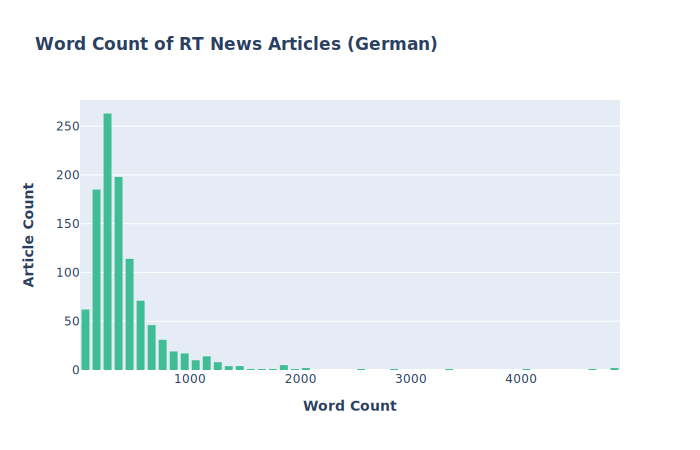

In [381]:
# Visualize word count of RT News Articles

fig = go.Figure()
fig.add_trace(go.Histogram(x=df_stats['Word Count'],
                           
                            # bins used for histogram
                           xbins=dict(start=1, end=df_stats['Word Count'].max(), size=100), marker_color='#41bd95'))




fig.update_layout(
    title_text='<b>Word Count of RT News Articles (German)</b>', # title of plot
    xaxis_title_text='<b>Word Count</b>', # xaxis label
    yaxis_title_text='<b>Article Count</b>', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show("svg")

       

In [416]:
# Visuliaze: word count by category
gesellschaft = df_stats[df_stats['Category']=='gesellschaft']['Word Count']
wirtschaft = df_stats[df_stats['Category']=='wirtschaft']['Word Count']
inland = df_stats[df_stats['Category']=='inland']['Word Count']
asien = df_stats[df_stats['Category']=='asien']['Word Count']
amerika = df_stats[df_stats['Category']=='amerika']['Word Count']
nordamerika = df_stats[df_stats['Category']=='nordamerika']['Word Count']
europa = df_stats[df_stats['Category']=='europa']['Word Count']
der_nahe_osten = df_stats[df_stats['Category']=='der-nahe-osten']['Word Count']
afrika = df_stats[df_stats['Category']=='afrika']['Word Count']
russland = df_stats[df_stats['Category']=='russland']['Word Count']


fig = make_subplots(rows=5, cols=2, vertical_spacing=0.03)

gesellschaft = go.Histogram(x=gesellschaft,
                      xbins=dict(start=1, end=df_stats['Word Count'].max(), size=100),
                      autobinx=False, name='Gesellschaft')

wirtschaft = go.Histogram(x=wirtschaft,
                      xbins=dict(start=1, end=df_stats['Word Count'].max(), size=100),
                      autobinx=False, name='Wirtschaft')

inland = go.Histogram(x=inland,
                      xbins=dict(start=1, end=df_stats['Word Count'].max(), size=100),
                      autobinx=False, name='Inland')

asien = go.Histogram(x=asien,
                      xbins=dict(start=1, end=df_stats['Word Count'].max(), size=100),
                      autobinx=False, name='Asien')

amerika = go.Histogram(x=amerika,
                      xbins=dict(start=1, end=df_stats['Word Count'].max(), size=100),
                      autobinx=False, name='Amerika')

nordamerika = go.Histogram(x=nordamerika,
                      xbins=dict(start=1, end=df_stats['Word Count'].max(), size=100),
                      autobinx=False, name='Nordamerika')

europa = go.Histogram(x=europa,
                      xbins=dict(start=1, end=df_stats['Word Count'].max(), size=100),
                      autobinx=False, name='Europa')

der_nahe_osten = go.Histogram(x=der_nahe_osten,
                      xbins=dict(start=1, end=df_stats['Word Count'].max(), size=100),
                      autobinx=False, name='Der nahe Osten')

afrika = go.Histogram(x=afrika,
                      xbins=dict(start=1, end=df_stats['Word Count'].max(), size=100),
                      autobinx=False, name='Afrika')

russland = go.Histogram(x=russland,
                      xbins=dict(start=1, end=df_stats['Word Count'].max(), size=100),
                      name='Russland')       

fig.update_yaxes(title_text='<b>Article Count</b>', range=[0, 40])
fig.update_xaxes(title_text='<b>Word Count</b>', range=[1, 5000])




fig.append_trace(gesellschaft, 1, 1)
fig.append_trace(wirtschaft, 1, 2)
fig.append_trace(amerika, 2, 1)
fig.append_trace(nordamerika, 2, 2)
fig.append_trace(der_nahe_osten, 3, 1)
fig.append_trace(afrika, 3, 2)
fig.append_trace(russland, 4, 1)
fig.append_trace(europa, 4, 2)
fig.append_trace(inland, 5, 1)
fig.append_trace(asien, 5, 2)



fig.update_layout(height=1000, width=1000,
                  title_text='<b>Word Count of RT News Articles (German) by Category</b>', # title of plot
                  # gap between bars of adjacent location coordinates
                  bargap=0.1,
                  # gap between bars of the same location coordinates
                  bargroupgap=0.3)

go.FigureWidget(fig)

FigureWidget({
    'data': [{'autobinx': False,
              'name': 'Gesellschaft',
              'type': 'h…

In [417]:
# Visulize: average word count by category

# extract average word count from df_stats and categories and append to list
category_list = df_stats['Category'].unique()

means =[]
categories= []

for category in category_list:
    mean = df[df_stats['Category']==category]['Word Count'].mean()
    means.append(mean)
    categories.append(category)
  

fig = px.bar(y=means, x=categories)

fig.update_traces(marker_color='#41bd57')
fig.update_layout(
    title_text='<b>Average Word Count of RT News Articles (German) by Category</b>', # title of plot
    xaxis_title_text='<b>Categories</b>', # xaxis label
    yaxis_title_text='<b>Average Word Count</b>', #yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

go.FigureWidget(fig)

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra>…

In [418]:
# Visualize: time of publication 

# extract hour of publication
hour = pd.to_datetime(df_stats['Time'], format='%H:%M:%S').dt.hour



fig = go.Figure()
fig.add_trace(go.Histogram(x=hour,
                            # bins used for histogram
                           xbins=dict(start=hour.min(), end=hour.max(), size=1), marker_color='#bd4169'
))


fig.update_layout(
    title_text='<b>Hour of Publication of RT News Articles (German)</b>', # title of plot
    xaxis_title_text='<b>Hour</b>', # xaxis label
    yaxis_title_text='<b>Article Count</b>',
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

go.FigureWidget(fig)



FigureWidget({
    'data': [{'marker': {'color': '#bd4169'},
              'type': 'histogram',
              …

In [430]:
# Viualize: Bag-of-words by category
gesellschaft = bow_df[bow_df['Category'] == 'gesellschaft']
wirtschaft = bow_df[bow_df['Category'] == 'wirtschaft']
inland =  bow_df[bow_df['Category'] == 'inland']
asien =  bow_df[bow_df['Category'] == 'asien']
amerika =  bow_df[bow_df['Category'] == 'amerika']
nordamerika = bow_df[bow_df['Category'] == 'nordamerika']
europa =  bow_df[bow_df['Category'] == 'europa']
der_nahe_osten =  bow_df[bow_df['Category'] == 'der-nahe-osten']
afrika =  bow_df[bow_df['Category'] == 'afrika']
russland =  bow_df[bow_df['Category'] == 'russland']


gesellschaft = go.Bar(y=gesellschaft['Most common word'], x=gesellschaft['Count Word'],
            marker=dict(color="#f3f416"), orientation='h', name='Gesellschaft')

wirtschaft = go.Bar(y=wirtschaft['Most common word'], x=wirtschaft['Count Word'],
            marker=dict(color="#19d4c6"), orientation='h', name='Wirtschaft')

inland = go.Bar(y=inland['Most common word'], x=inland['Count Word'],
            marker=dict(color="#211bc9"), orientation='h', name='Inland')

asien = go.Bar(y=asien['Most common word'], x=asien['Count Word'],
            marker=dict(color="#b416c7"), orientation='h', name='Asien')

amerika = go.Bar(y=amerika['Most common word'], x=amerika['Count Word'],
            marker=dict(color="#ec8c16"), orientation='h', name='Amerika')

nordamerika = go.Bar(y=nordamerika['Most common word'], x=nordamerika['Count Word'],
            marker=dict(color="#b26363"), orientation='h',name='Nordamerika')

europa = go.Bar(y=europa['Most common word'],x=europa['Count Word'],
            marker=dict(color="#20d62c"), orientation='h', name='Europa')

der_nahe_osten = go.Bar(y=der_nahe_osten['Most common word'], x=der_nahe_osten['Count Word'],
            marker=dict(color="#d41763"), orientation='h', name='Der nahe Osten')

afrika = go.Bar(y=afrika['Most common word'], x=afrika['Count Word'],
            marker=dict(color="#a72727"), orientation='h', name='Afrika')

russland = go.Bar(y=russland['Most common word'], x=russland['Count Word'],
            marker=dict(color="#458b74"), orientation='h', name='Russland')




fig = plotly.subplots.make_subplots(rows=10, cols=1, vertical_spacing=0.01)

fig.append_trace(gesellschaft, 1,1)
fig.append_trace(wirtschaft, 2, 1)
fig.append_trace(inland, 3,1)
fig.append_trace(europa, 4, 1)
fig.append_trace(asien, 5,1)
fig.append_trace(der_nahe_osten, 6, 1)
fig.append_trace(russland, 7,1)
fig.append_trace(nordamerika, 8, 1)
fig.append_trace(amerika, 9,1)
fig.append_trace(afrika, 10, 1)


fig.update_yaxes(title_text='<b>Most common Words</b>')
fig.update_xaxes(title_text='<b>Word Count</b>')

fig.update_layout(height=5000, width=1000,
                  title_text='<b>Most common Words of RT News Articles (German) by Category</b>', # title of plot
                  # gap between bars of adjacent location coordinates
                  bargap=0.2,
                  # gap between bars of the same location coordinates
                  bargroupgap=0.01)




go.FigureWidget(fig)

FigureWidget({
    'data': [{'marker': {'color': '#f3f416'},
              'name': 'Gesellschaft',
           …

In [437]:
# Visualize: most common trigrams of each category

gesellschaft = trigram_df[trigram_df['Category'] == 'gesellschaft']
wirtschaft = trigram_df[trigram_df['Category'] == 'wirtschaft']
inland =  trigram_df[trigram_df['Category'] == 'inland']
asien =  trigram_df[trigram_df['Category'] == 'asien']
amerika =  trigram_df[trigram_df['Category'] == 'amerika']
nordamerika = trigram_df[trigram_df['Category'] == 'nordamerika']
europa =  trigram_df[trigram_df['Category'] == 'europa']
der_nahe_osten =  trigram_df[trigram_df['Category'] == 'der-nahe-osten']
afrika =  trigram_df[trigram_df['Category'] == 'afrika']
russland =  trigram_df[trigram_df['Category'] == 'russland']


gesellschaft = go.Bar(y=gesellschaft['Most common trigram'], x=gesellschaft['Count Trigram'],
            marker=dict(color="#f3f416"), orientation='h', name='Gesellschaft')

wirtschaft = go.Bar(y=wirtschaft['Most common trigram'], x=wirtschaft['Count Trigram'],
            marker=dict(color="#19d4c6"), orientation='h', name='Wirtschaft')

inland = go.Bar(y=inland['Most common trigram'], x=inland['Count Trigram'],
            marker=dict(color="#211bc9"), orientation='h', name='Inland')

asien = go.Bar(y=asien['Most common trigram'], x=asien['Count Trigram'],
            marker=dict(color="#b416c7"), orientation='h', name='Asien')

amerika = go.Bar(y=amerika['Most common trigram'], x=amerika['Count Trigram'],
            marker=dict(color="#ec8c16"), orientation='h', name='Amerika')

nordamerika = go.Bar(y=nordamerika['Most common trigram'], x=nordamerika['Count Trigram'],
            marker=dict(color="#b26363"), orientation='h',name='Nordamerika')

europa = go.Bar(y=europa['Most common trigram'],x=europa['Count Trigram'],
            marker=dict(color="#20d62c"), orientation='h', name='Europa')

der_nahe_osten = go.Bar(y=der_nahe_osten['Most common trigram'], x=der_nahe_osten['Count Trigram'],
            marker=dict(color="#d41763"), orientation='h', name='Der nahe Osten')

afrika = go.Bar(y=afrika['Most common trigram'], x=afrika['Count Trigram'],
            marker=dict(color="#a72727"), orientation='h', name='Afrika')

russland = go.Bar(y=russland['Most common trigram'], x=russland['Count Trigram'],
            marker=dict(color="#458b74"), orientation='h', name='Russland')




fig = plotly.subplots.make_subplots(rows=10, cols=1, vertical_spacing=0.01)

fig.append_trace(gesellschaft, 1,1)
fig.append_trace(wirtschaft, 2, 1)
fig.append_trace(inland, 3,1)
fig.append_trace(europa, 4, 1)
fig.append_trace(asien, 5,1)
fig.append_trace(der_nahe_osten, 6, 1)
fig.append_trace(russland, 7,1)
fig.append_trace(nordamerika, 8, 1)
fig.append_trace(amerika, 9,1)
fig.append_trace(afrika, 10, 1)


fig.update_yaxes(title_text='<b>Most common Trigrams</b>')
fig.update_xaxes(title_text='<b>Trigram Count</b>')

fig.update_layout(height=5000, width=1000,
                  title_text='<b>Most common Trigrams of RT News Articles (German) by Category</b>', # title of plot
                  # gap between bars of adjacent location coordinates
                  bargap=0.2,
                  # gap between bars of the same location coordinates
                  bargroupgap=0.01)




go.FigureWidget(fig)

FigureWidget({
    'data': [{'marker': {'color': '#f3f416'},
              'name': 'Gesellschaft',
           …